In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
inputfile = "/Users/cmdb/qbb2020-answers/assignment2/A01_var_predictions.vcf"

#Question 8 Part 1 and 2
#DP, 3rd field, read depth of variant
#GQ, 2nd field, genome quality, confidence in genotype call
f = open(inputfile, 'r')
readDepths = []
genomeQuals = []


for line in f: 
    #skip header
    if "#" in line:
        continue
    
    line = line.rstrip('\r\n').split('\t')
    formats = line[8]
    format_fields = formats.split(':')
    DPindex = format_fields.index('DP')
    GQindex = format_fields.index('GQ')
    
    #double-checking format does not change
    if DPindex != 2:
        print("DP INDEX CHANGED")
    if GQindex != 1:
        print("GQ INDEX CHANGED")

    strains_info = line[9:]
    
    for strain in strains_info:
        fields = strain.split(':')
        
        #grab read depth
        readDepth = fields[DPindex]
        if readDepth != '.':
            readDepths.append(int(readDepth))
            
        #grab reference allele quality
        genomeQual = fields[GQindex]
        if genomeQual != '.':
            genomeQuals.append(float(genomeQual))
        
    

f.close()

In [3]:
#Question 8 Part 3
#find allele frequency in info fields

f = open(inputfile, 'r')
alleleFreqs = []

for line in f:
    
    #skip header
    if "#" in line:
        continue
    
    line = line.rstrip('\r\n').split('\t')
    info = line [7]
    
    #allele frequence is "AF" in info fields
    infoFields = info.split(';')
    alleleFreq = infoFields[3] 
    alleleFreq = alleleFreq.split('=')
    frequencies = (alleleFreq[1])
    
    #handle multi-allelic frequencies
    frequencies = frequencies.split(',')
    for frequency in frequencies:
        alleleFreqs.append(float(frequency))
    
f.close()
#print(alleleFreqs)

In [4]:
#Question 8 Part 4
f = open(inputfile, 'r')
variant_effects = {}
i = 0
for line in f:
    
    #skip header
    if "#" in line:
        continue
        
    line = line.rstrip('\r\n').split('\t')
    info = line [7]
    #allele frequence is "AF" in info fields
    infoFields = info.split(';')
    for infoField in infoFields:
        if "ANN=" in infoField:
            annFields = infoField
            annFields = annFields.split("|")
            annotation = annFields[1]
            
            #no annotation given for variant, skip it
            if annotation == '':
                continue

            #fill out dictionary of variant types
            if annotation not in variant_effects.keys():
                variant_effects[annotation] = 1
            else:
                variant_effects[annotation] +=1
        else:
            "no annotation for variant!"

f.close()


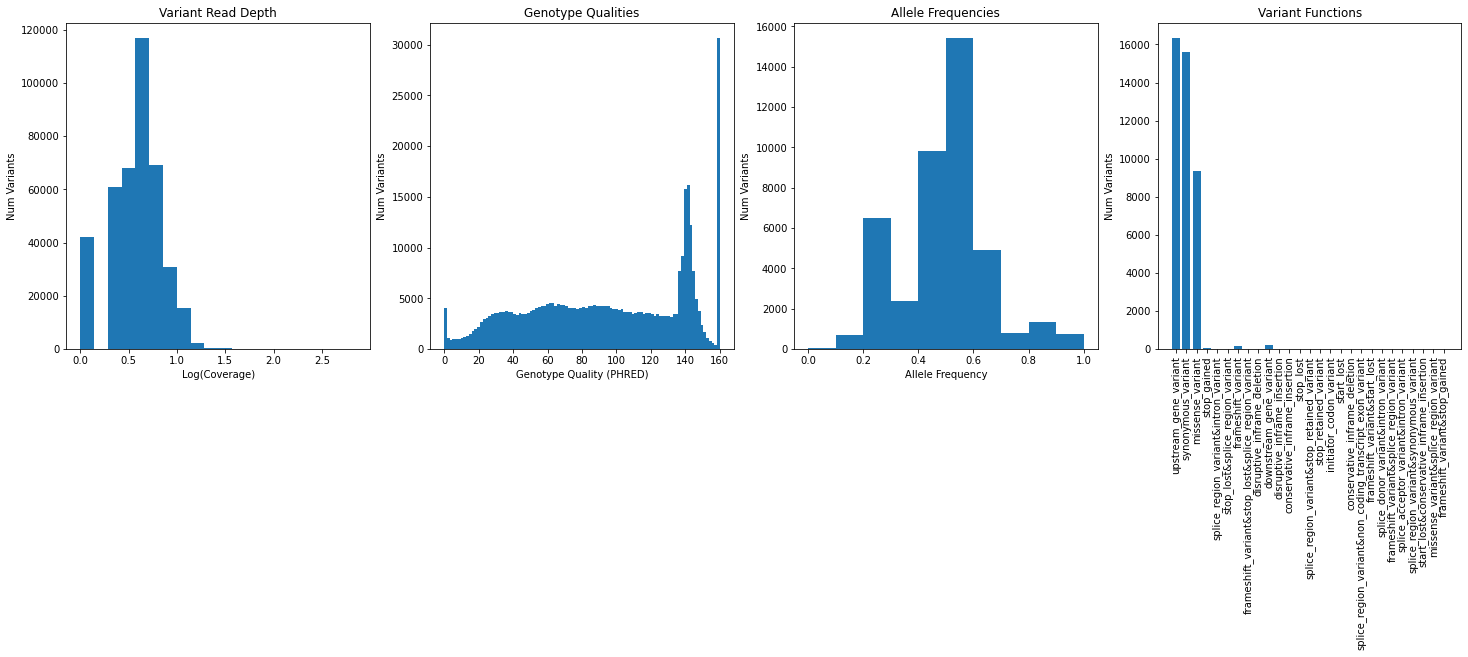

In [5]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (25, 6))

ax1.hist(np.log10(readDepths), bins = 20)
ax2.hist(genomeQuals, bins = 100)
ax3.hist(alleleFreqs)
ax4.bar(variant_effects.keys(), variant_effects.values())

ax1.set_title("Variant Read Depth")
ax1.set_ylabel("Num Variants")
ax1.set_xlabel("Log(Coverage)")

ax2.set_title("Genotype Qualities")
ax2.set_ylabel("Num Variants")
ax2.set_xlabel("Genotype Quality (PHRED)")

ax3.set_title("Allele Frequencies")
ax3.set_ylabel("Num Variants")
ax3.set_xlabel("Allele Frequency")

ax4.set_title("Variant Functions")
ax4.set_ylabel("Num Variants")

plt.xticks(rotation=90)

plt.show()